#### Nitin Chandrasekhar
#### 801348658
#### Assignment 3
#### Github link https://github.com/nchan18/ECGR_4105_Assignments.git


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
import warnings
import warnings
from sklearn.exceptions import ConvergenceWarning




In [74]:
def plot_training_curve(loss_per_epoch, accuracy_per_epoch, title="Training Curve"):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_per_epoch, label='Log Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title(f'{title} - Log Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_per_epoch, label='Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()


def report_results(y_true, y_pred, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== {dataset_name} Results ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


=== Problem 1: Diabetes Dataset ===


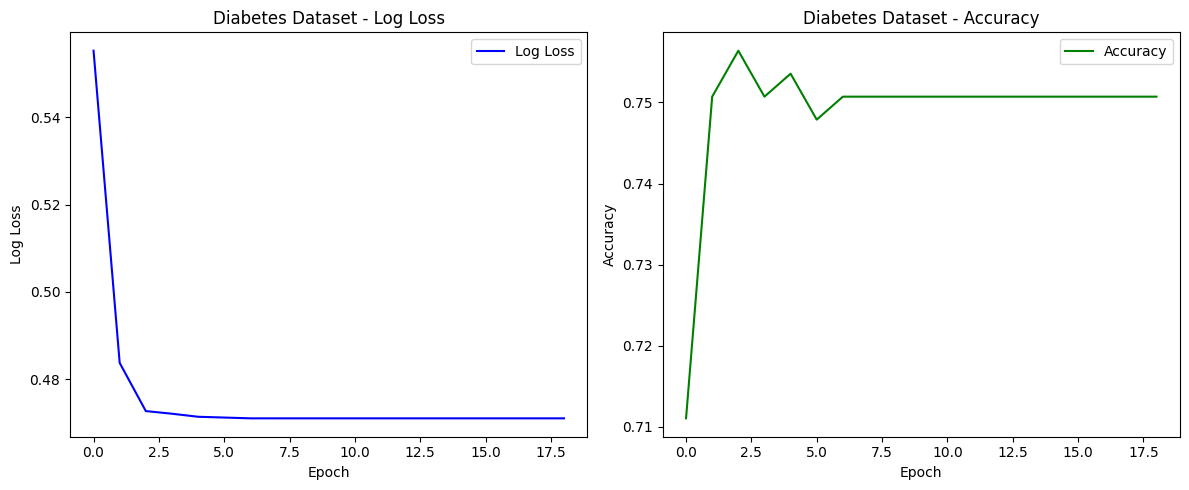


=== Diabetes Dataset Results ===
Accuracy : 0.7416
Precision: 0.7143
Recall   : 0.7955
F1 Score : 0.7527


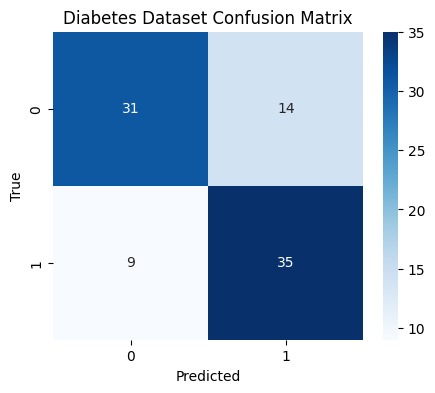

In [75]:
print("\n=== Problem 1: Diabetes Dataset ===")

X, y = load_diabetes(return_X_y=True)
y = (y > np.median(y)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_diabetes = LogisticRegression(solver='lbfgs', max_iter=5000, verbose=0,warm_start=True)

epoch_accuracies = []
loss_per_epoch = []
for epoch in range(1, 20):
    model_diabetes.max_iter = epoch
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model_diabetes.fit(X_train, y_train)
    train_acc = model_diabetes.score(X_train, y_train)
    epoch_accuracies.append(train_acc)
    y_pred_proba = model_diabetes.predict_proba(X_train) 
    loss = log_loss(y_train, y_pred_proba) 
    loss_per_epoch.append(loss)
model_diabetes.fit(X_train, y_train)

y_pred = model_diabetes.predict(X_test)

plot_training_curve(loss_per_epoch,epoch_accuracies, "Diabetes Dataset")
report_results(y_test, y_pred, "Diabetes Dataset")




=== Problem 2a: Breast Cancer Dataset (No Regularization) ===


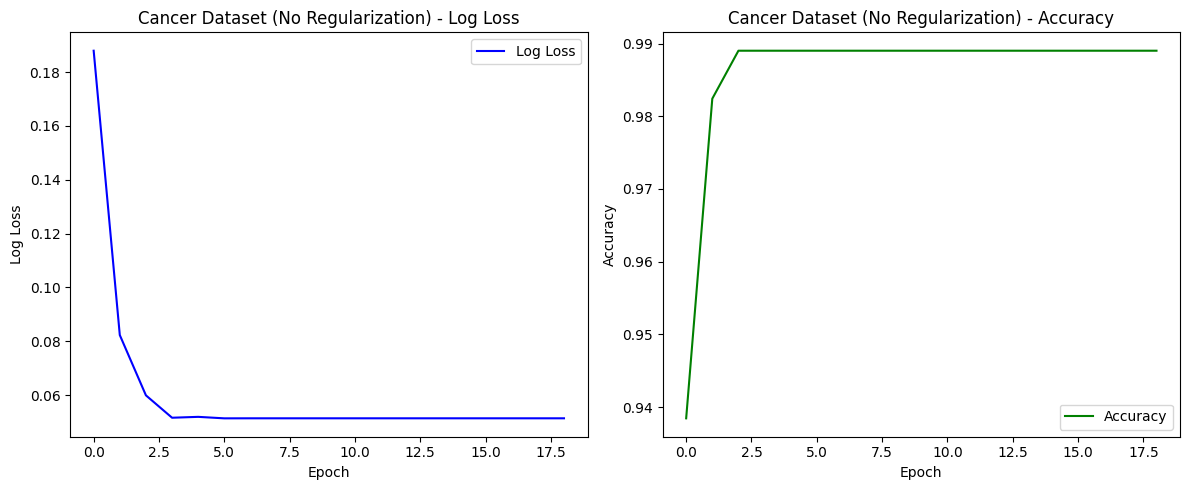


=== Cancer Dataset (No Regularization) Results ===
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1 Score : 0.9861


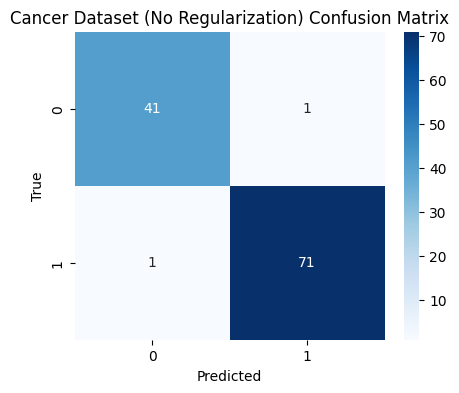

In [76]:
print("\n=== Problem 2a: Breast Cancer Dataset (No Regularization) ===")

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_cancer = LogisticRegression(solver='lbfgs', max_iter=5000, verbose=0, warm_start=True)
epoch_accuracies = []
loss_per_epoch = []
for epoch in range(1, 20):
    model_cancer.max_iter = epoch
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model_cancer.fit(X_train, y_train)
    train_acc = model_cancer.score(X_train, y_train)
    epoch_accuracies.append(train_acc)
    y_pred_proba = model_cancer.predict_proba(X_train) 
    loss = log_loss(y_train, y_pred_proba) 
    loss_per_epoch.append(loss)
model_cancer.fit(X_train, y_train)


y_pred = model_cancer.predict(X_test)
plot_training_curve(loss_per_epoch,epoch_accuracies, "Cancer Dataset (No Regularization)")
report_results(y_test, y_pred, "Cancer Dataset (No Regularization)")


=== Problem 2b: Breast Cancer Dataset (With L2 Regularization) ===


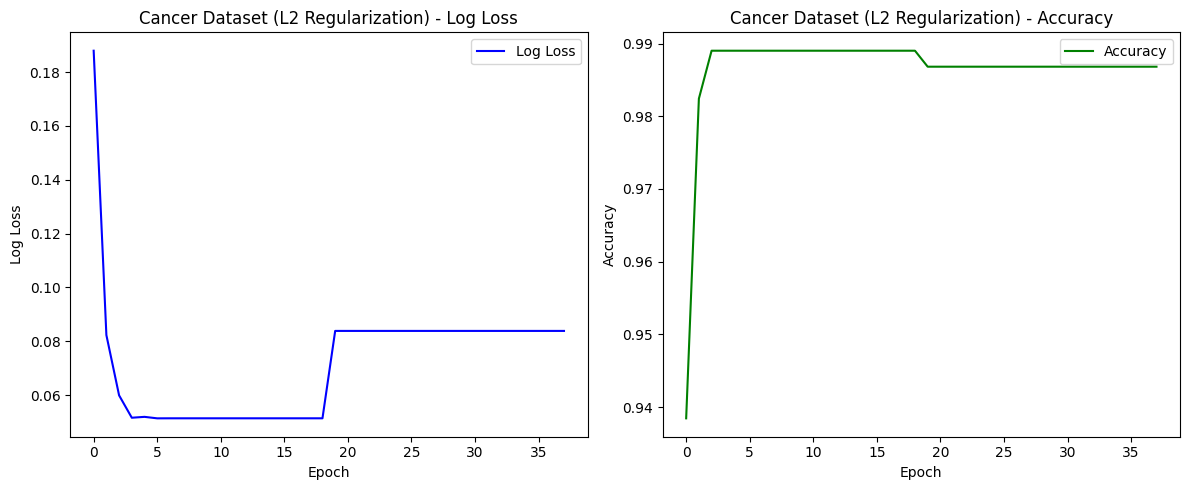


=== Cancer Dataset (L2 Regularization) Results ===
Accuracy : 0.9737
Precision: 0.9726
Recall   : 0.9861
F1 Score : 0.9793


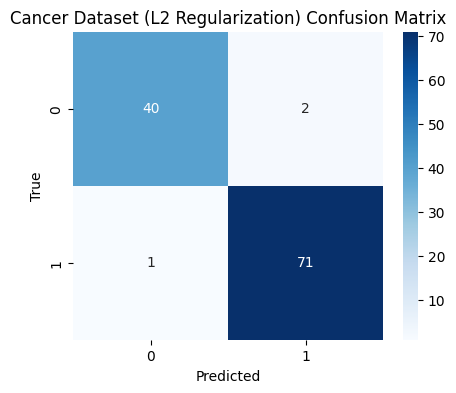

In [77]:
print("\n=== Problem 2b: Breast Cancer Dataset (With L2 Regularization) ===")

model_cancer_reg = LogisticRegression(solver='lbfgs', max_iter=5000, verbose=0, C=0.1, warm_start=True)
model_cancer_reg.fit(X_train, y_train)

y_pred_reg = model_cancer_reg.predict(X_test)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    for epoch in range(1, 20):
        model_cancer_reg.max_iter = epoch
        model_cancer_reg.fit(X_train, y_train)
        train_acc = model_cancer_reg.score(X_train, y_train)
        epoch_accuracies.append(train_acc)
        y_pred_proba = model_cancer_reg.predict_proba(X_train)  
        loss = log_loss(y_train, y_pred_proba) 
        loss_per_epoch.append(loss)
    model_cancer_reg.fit(X_train, y_train)
plot_training_curve(loss_per_epoch,epoch_accuracies, "Cancer Dataset (L2 Regularization)")
report_results(y_test, y_pred_reg, "Cancer Dataset (L2 Regularization)")


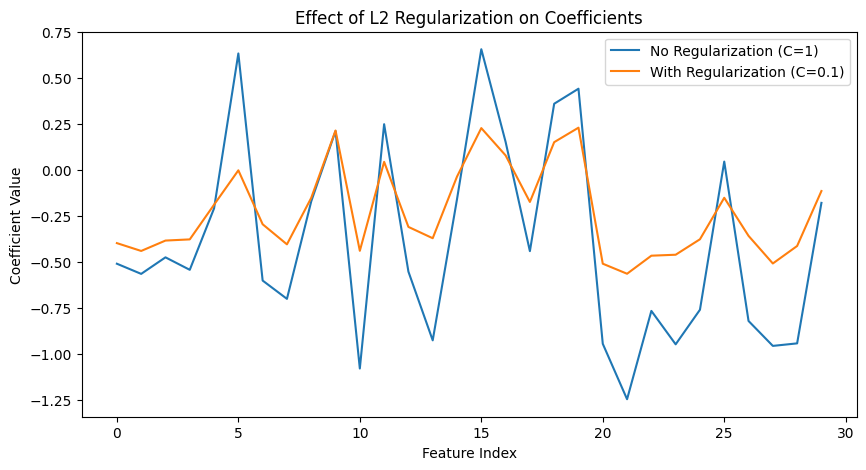

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(model_cancer.coef_.flatten(), label="No Regularization (C=1)")
plt.plot(model_cancer_reg.coef_.flatten(), label="With Regularization (C=0.1)")
plt.title("Effect of L2 Regularization on Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()